<a href="https://colab.research.google.com/github/Palak1593/Big-Mart-Sales-Prediction/blob/main/Machine_Learning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load dataset

In [ ]:
import pandas as pd
df=pd.read_csv('/content/Big Mart Sale Data.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


#Data Preprocessing

Null values

In [ ]:
# number of data points & number of features
df.shape

(8523, 12)

In [ ]:
# getting some information about thye dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Categorical Features:
- Item_Identifier
- Item_Fat_Content
- Item_Type
- Outlet_Identifier
- Outlet_Size
- Outlet_Location_Type
- Outlet_Type

In [ ]:
# checking for missing values
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Handling Missing Values

Mean --> average

Mode --> more repeated value

Mean imputation is used for Item_Weight.
Mode imputation is used for Outlet_Size


In [ ]:
# mean value of "Item_Weight" column
df['Item_Weight'].mean()

12.857645184135976

In [ ]:
# filling the missing values in "Item_weight column" with "Mean" value
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)

In [ ]:
# mode of "Outlet_Size" column
df['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [ ]:
# filling the missing values in "Outlet_Size" column with Mode
#lambda function is used to find mode by making pivot table of dataframe
mode_of_Outlet_size = df.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

In [ ]:
print(mode_of_Outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [ ]:
miss_values = df['Outlet_Size'].isnull()

In [ ]:
df.loc[miss_values, 'Outlet_Size'] = df.loc[miss_values,'Outlet_Type'].apply(lambda x: mode_of_Outlet_size[x])

In [ ]:
# checking for missing values
null_values=df['Outlet_Size'].isnull().sum()

In [ ]:
null_values

0

Outlier Analysis

In [ ]:
import seaborn as sns

<Axes: xlabel='Item_Weight'>

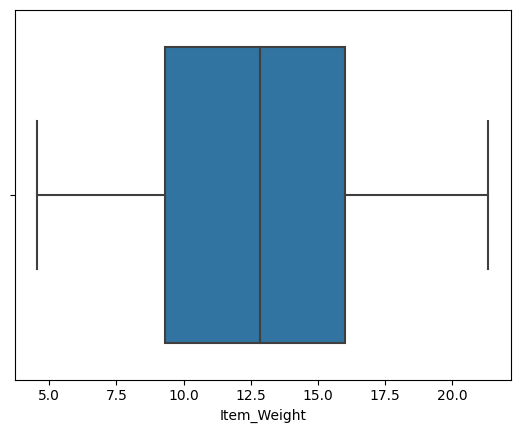

In [ ]:
import seaborn as sns
sns.boxplot(x=df['Item_Weight'])

In [ ]:
import numpy as np
def calculate_IQR(data):
  Q1 = np.percentile(data, 25)
  Q3 = np.percentile(data, 75)
  IQR = Q3 - Q1
  return IQR

# Calculate the IQR of the Item_Visibilityd column
IQR = calculate_IQR(df['Item_Visibility'])

def identify_outliers(data, IQR):
  Q1 = np.percentile(data, 25)
  Q3 = np.percentile(data, 75)
  lower_fence = Q1 - (1.5 * IQR)
  upper_fence = Q3 + (1.5 * IQR)
  outliers = []
  for value in data:
    if value < lower_fence or value > upper_fence:
      outliers.append(value)
  return outliers

# Identify outliers in the Item_weight column
outliers = identify_outliers(df['Item_Visibility'], IQR)

<Axes: xlabel='Item_Visibility'>

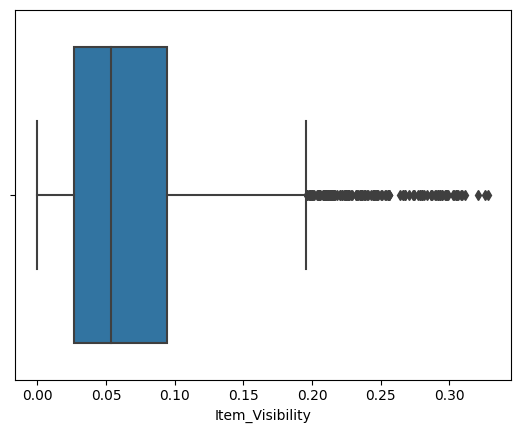

In [ ]:
sns.boxplot(x=df['Item_Visibility'])

In [ ]:
import pandas as pd
import numpy as np

# Calculate the IQR of the Item_weight column
IQR = calculate_IQR(df['Item_Visibility'])

# Identify outliers in the Item_weight column
outliers = identify_outliers(df['Item_Visibility'], IQR)

# Print the number of outliers
print('Number of outliers:', len(outliers))

Number of outliers: 144


In [ ]:

# Calculate the mean and standard deviation of the Item_Visibility column
mean = df['Item_Visibility'].mean()
std = df['Item_Visibility'].std()

# Calculate the Z-score for each data point in the Item_Visibility column
df['Item_Visibility_zscore'] = (df['Item_Visibility'] - mean) / std

# Identify any data points with a Z-score of 3 or greater
outliers = df[df['Item_Visibility_zscore'] >= 3]



In [ ]:
#Remove the identified data points from the DataFrame
z_score_threshold = 2

# Use boolean indexing to filter out rows where z-scores exceed the threshold
df = df[df['Item_Visibility_zscore'].abs() <= z_score_threshold]


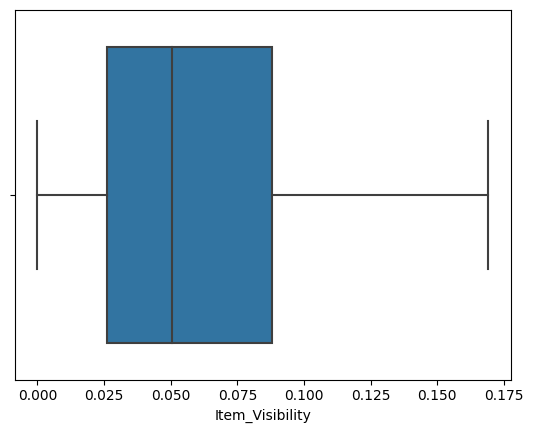

In [ ]:
import matplotlib.pyplot as plt
sns.boxplot(x=df['Item_Visibility'])
plt.show()

Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
df['Item_Identifier'] = encoder.fit_transform(df['Item_Identifier'])

df['Item_Fat_Content'] = encoder.fit_transform(df['Item_Fat_Content'])

df['Item_Type'] = encoder.fit_transform(df['Item_Type'])

df['Outlet_Identifier'] = encoder.fit_transform(df['Outlet_Identifier'])

df['Outlet_Size'] = encoder.fit_transform(df['Outlet_Size'])

df['Outlet_Location_Type'] = encoder.fit_transform(df['Outlet_Location_Type'])

df['Outlet_Type'] = encoder.fit_transform(df['Outlet_Type'])

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Visibility_zscore
0,155,9.30,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380,-0.970675
1,8,5.92,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228,-0.908058
2,655,17.50,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700,-0.956861
3,1106,19.20,2,0.000000,6,182.0950,0,1998,2,2,0,732.3800,-1.281683
4,1278,8.93,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052,-1.281683


Dataset Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['Item_Visibility']=scaler.fit_transform(df['Item_Visibility'].values.reshape(-1, 1)).flatten()

Feature Selection

In [ ]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Visibility_zscore
0,155,9.300,1,0.094876,4,249.8092,9,1999,1,0,1,3735.1380,-0.970675
1,8,5.920,2,0.113978,14,48.2692,3,2009,1,2,2,443.4228,-0.908058
2,655,17.500,1,0.099091,10,141.6180,9,1999,1,0,1,2097.2700,-0.956861
3,1106,19.200,2,0.000000,6,182.0950,0,1998,2,2,0,732.3800,-1.281683
4,1278,8.930,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052,-1.281683
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,365,6.865,1,0.335720,13,214.5218,1,1987,0,2,1,2778.3834,-0.181183
8519,886,8.380,2,0.277774,0,108.1570,7,2002,2,1,1,549.2850,-0.371132
8520,1337,10.600,1,0.208032,8,85.1224,6,2004,2,1,1,1193.1136,-0.599749
8521,674,7.210,2,0.858587,13,103.1332,3,2009,1,2,2,1845.5976,1.532790


Correlation

In [ ]:
# Assuming 'df' is your DataFrame
columns_to_drop = ['Item_Visibility_zscore']  # List of column names to drop

df = df.drop(columns=columns_to_drop)


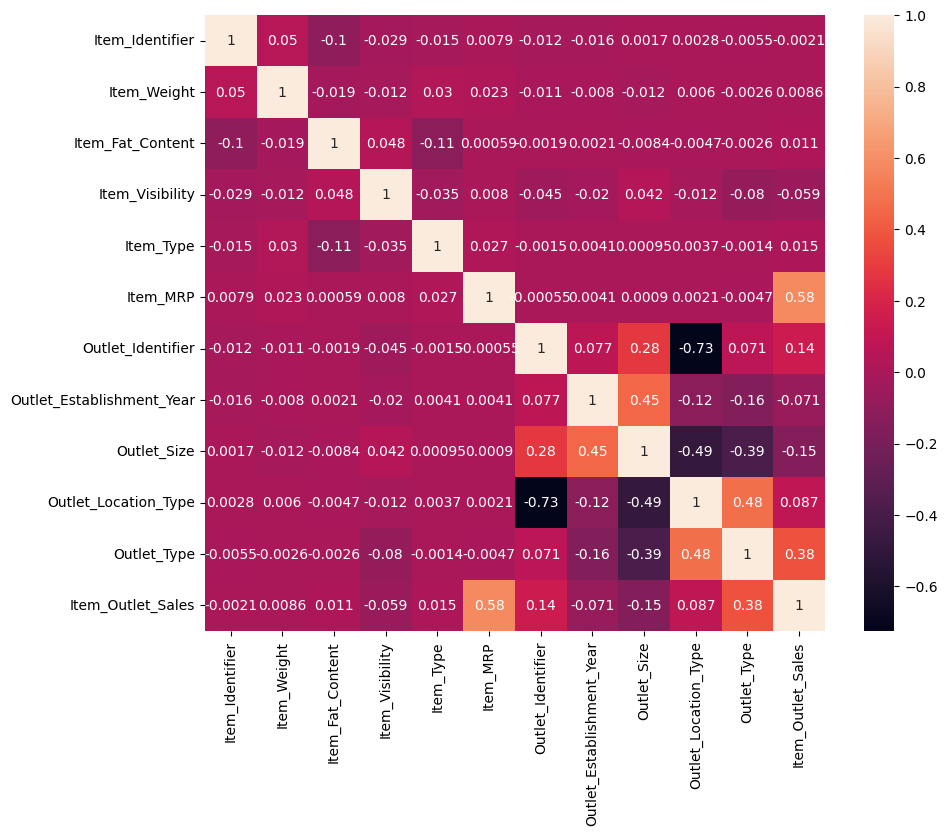

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a larger figure before creating the heatmap
plt.figure(figsize=(10, 8))  # Adjust the width and height as needed

# Create the heatmap
sns.heatmap(df.iloc[:, 0:12].corr(), annot=True)

# Show the heatmap
plt.show()


In [ ]:

columns_to_drop = ['Item_Identifier','Item_Weight']  # List of column names to drop

df_new = df.drop(columns=columns_to_drop)


In [ ]:
df_new

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,1,0.094876,4,249.8092,9,1999,1,0,1,3735.1380
1,2,0.113978,14,48.2692,3,2009,1,2,2,443.4228
2,1,0.099091,10,141.6180,9,1999,1,0,1,2097.2700
3,2,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,1,0.335720,13,214.5218,1,1987,0,2,1,2778.3834
8519,2,0.277774,0,108.1570,7,2002,2,1,1,549.2850
8520,1,0.208032,8,85.1224,6,2004,2,1,1,1193.1136
8521,2,0.858587,13,103.1332,3,2009,1,2,2,1845.5976


In [ ]:
df_new.shape

(8155, 10)

Machine Learning Model Training

Linear Regression

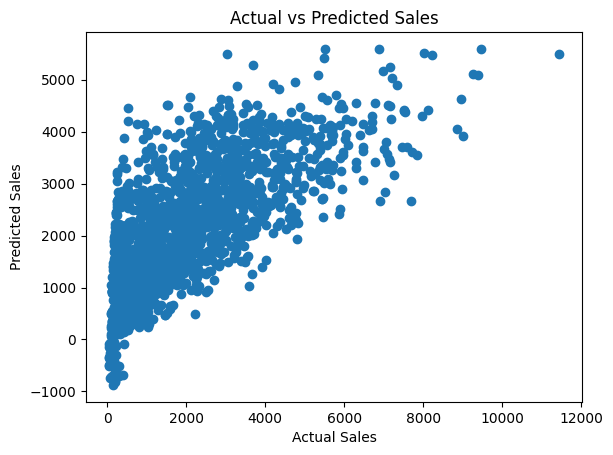

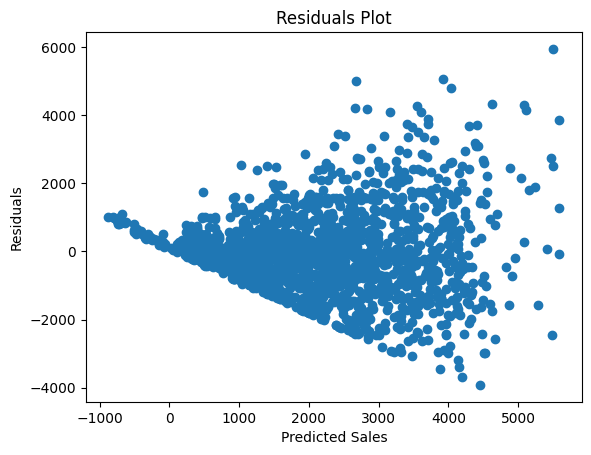

Mean Absolute Error (MAE): 910.595194203915
Mean Squared Error (MSE): 1486833.6704515875
Root Mean Squared Error (RMSE): 1219.3578926843372
R-squared (R2): 0.49323563318517694


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt



# Extract features and target variable
X = df_new.drop('Item_Outlet_Sales', axis=1)  # Features
y = df_new['Item_Outlet_Sales']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Instantiate and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
predicted_sales = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, predicted_sales)
mse = mean_squared_error(y_test, predicted_sales)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predicted_sales)

# Visualize the results (scatter plot)
plt.scatter(y_test, predicted_sales)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()

# Optionally, plot the residuals
residuals = y_test - predicted_sales
plt.scatter(predicted_sales, residuals)
plt.xlabel('Predicted Sales')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

# Print evaluation metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2): {r2}')


Random Forest


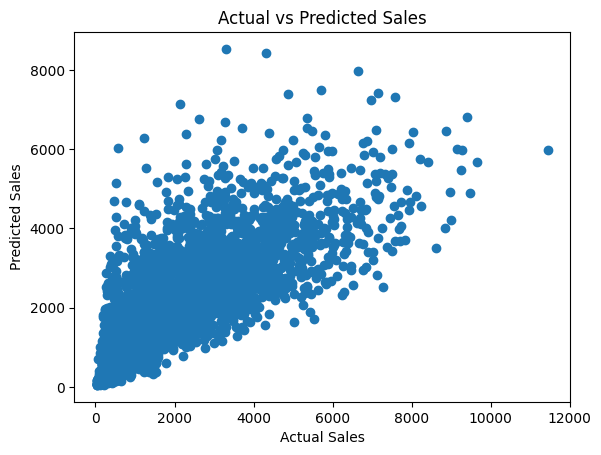

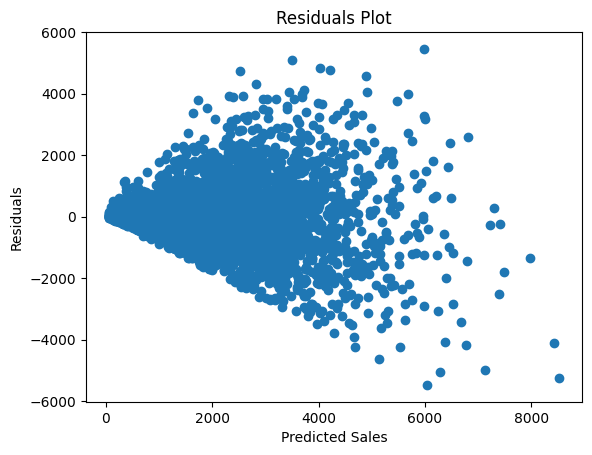

Mean Absolute Error (MAE): 802.4327695291232
Mean Squared Error (MSE): 1304739.8448212333
Root Mean Squared Error (RMSE): 1142.2520933757282
R-squared (R2): 0.5511861576664965


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Extract features and target variable
X = df_new.drop('Item_Outlet_Sales', axis=1)  # Features
y = df_new['Item_Outlet_Sales']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# Instantiate and train the model (Random Forest as an example)
model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(X_train, y_train)

# Make predictions on the testing set
predicted_sales = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, predicted_sales)
mse = mean_squared_error(y_test, predicted_sales)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predicted_sales)

# Visualize the results (scatter plot)
plt.scatter(y_test, predicted_sales)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()

# Optionally, plot the residuals
residuals = y_test - predicted_sales
plt.scatter(predicted_sales, residuals)
plt.xlabel('Predicted Sales')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

# Print evaluation metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2): {r2}')

Decision Tree

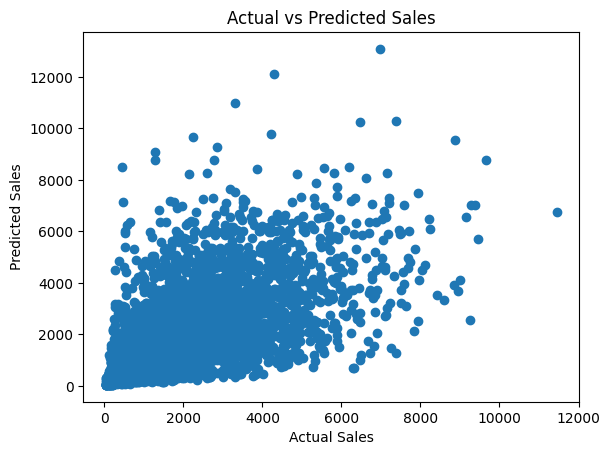

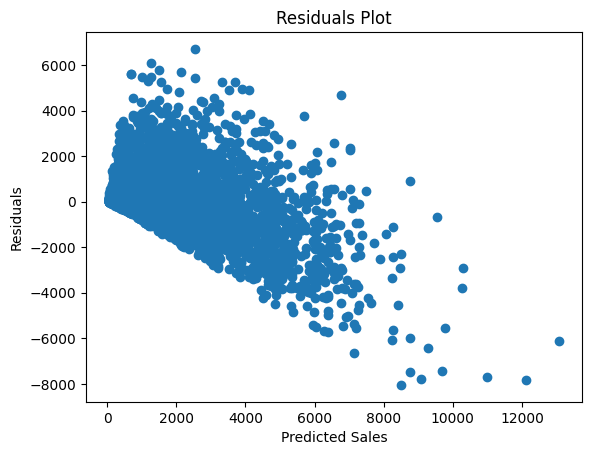

Mean Absolute Error (MAE): 1095.2616148988352
Mean Squared Error (MSE): 2455623.238902867
Root Mean Squared Error (RMSE): 1567.0428325042258
R-squared (R2): 0.15529696931540926


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor  # Change this line
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt


# Extract features and target variable
X = df_new.drop('Item_Outlet_Sales', axis=1)  # Features
y = df_new['Item_Outlet_Sales']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# Instantiate and train the model (Decision Tree instead of RandomForest)
model = DecisionTreeRegressor(random_state=0)  # Change this line
model.fit(X_train, y_train)

# Make predictions on the testing set
predicted_sales = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, predicted_sales)
mse = mean_squared_error(y_test, predicted_sales)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predicted_sales)

# Visualize the results (scatter plot)
plt.scatter(y_test, predicted_sales)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()

# Optionally, plot the residuals
residuals = y_test - predicted_sales
plt.scatter(predicted_sales, residuals)
plt.xlabel('Predicted Sales')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

# Print evaluation metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2): {r2}')

Conclusion Random Forest gives the best output.